In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
from fastai.vision import *
from fastai.metrics import error_rate

bs = 16

In [11]:
imagefiles = get_image_files('./images/train')
np.random.seed(2)
imagefiles[:5]

[PosixPath('images/train/board3_green-diamond-empty-single.png'),
 PosixPath('images/train/board5_red-diamond-filled-triple.png'),
 PosixPath('images/train/board5_green-diamond-empty-single.png'),
 PosixPath('images/train/board3_purple-diamond-empty-triple.png'),
 PosixPath('images/train/board1_red-squiggle-hashed-triple.png')]

/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("D

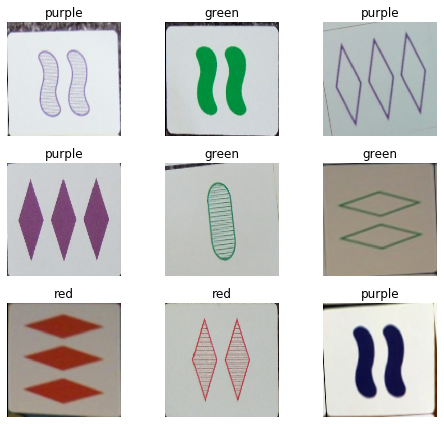

In [27]:
label_pattern = r'/board\d+_(red|green|purple)-(diamond|oval|squiggle)-(empty|filled|hashed)-(single|double|triple).png$'
bunch = ImageDataBunch.from_name_re('.', imagefiles, label_pattern, ds_tfms=get_transforms(max_zoom=1, max_warp=None), size=224, bs=bs, resize_method=ResizeMethod.SQUISH).normalize(imagenet_stats)
bunch.show_batch(rows=3, figsize=(7,6))

In [29]:
print(bunch.classes)
len(bunch.classes),bunch.c

['green', 'purple', 'red']


(3, 3)

In [31]:
learn = cnn_learner(bunch, models.resnet34, metrics=error_rate)
learn.model

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /Users/memetral/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 19.6MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [33]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("D

RuntimeError: Caught RuntimeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 47, in fetch
    return self.collate_fn(data)
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/fastai/torch_core.py", line 127, in data_collate
    return torch.utils.data.dataloader.default_collate(to_data(batch))
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in default_collate
    return [default_collate(samples) for samples in transposed]
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 79, in <listcomp>
    return [default_collate(samples) for samples in transposed]
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/utils/data/_utils/collate.py", line 53, in default_collate
    storage = elem.storage()._new_shared(numel)
  File "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/storage.py", line 128, in _new_shared
    return cls._new_using_filename(size)
RuntimeError: error executing torch_shm_manager at "/Users/memetral/.local/share/virtualenvs/jupyter-5S1mKFjG/lib/python3.7/site-packages/torch/bin/torch_shm_manager" at ../torch/lib/libshm/core.cpp:99
